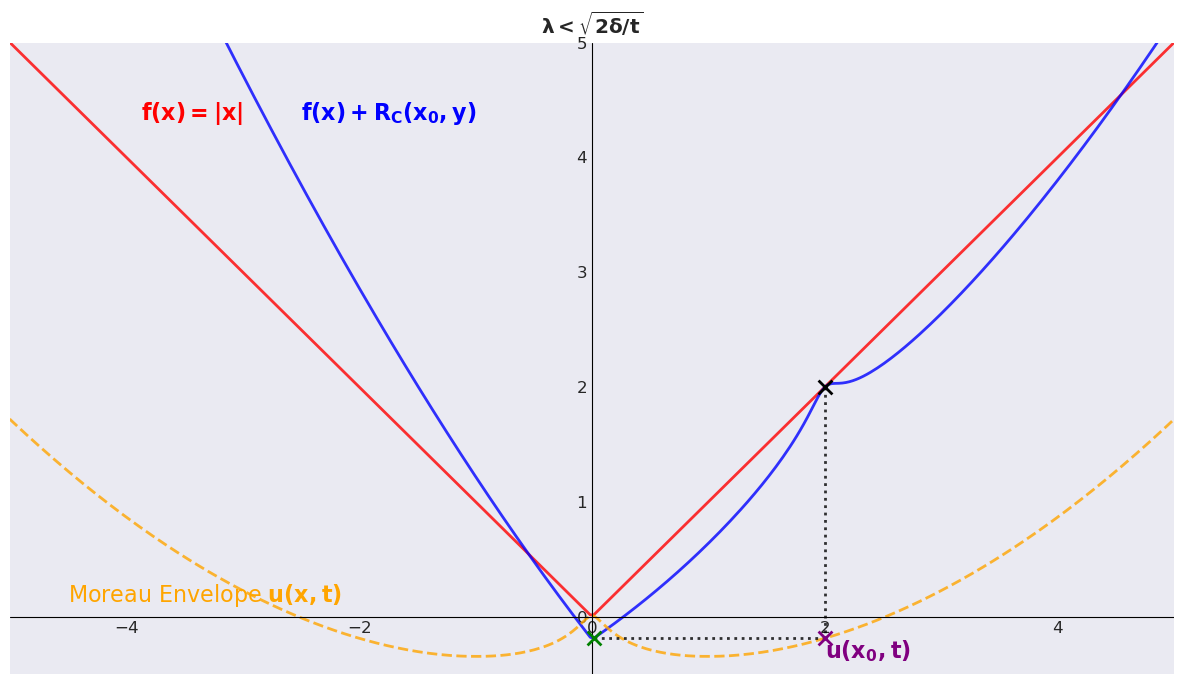

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Style settings for a polished look
mpl.style.use('seaborn-darkgrid')
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2

# Define the regularization term
def regularization_term(x, z,t):
    return 1/(2*t) * (x - z) ** 2 

def cauchy_regularization_term(x, z,t,delta):
    l = 0.1*np.sqrt(2*delta/t)
    return regularization_term(x, z,t) - delta * np.log(((x - z)/(l*t)) ** 2 +1) 

# Define the Moreau envelope
def cauchy_moreau_envelope(f, x, t, z,delta):
    return np.min(f(z) + cauchy_regularization_term(x, z, t,delta))



## CONVEX BUT NON-SMOOTH FUNCTION

# Define the non-smooth function f(z)
def f(z):
    return np.abs(z)

# Generate z values
z = np.linspace(-6, 6, 400)

# Fixed point x to visualize around
x_fixed = 2
t=5
delta = 0.1
y_f = f(z)  # Non-smooth function values
y_reg = cauchy_regularization_term(x_fixed, z,t,delta)  # Regularization term values
y_combined = y_f + y_reg  # Combined function values

# # Create the plot
# plt.figure(figsize=(12, 7))

# # Plot non-smooth function f(z)
# plt.plot(z, y_f, label='Non-Smooth Function $f(z) = |z|$', 
#          color='red', alpha=0.8)

# # Plot combined function
# plt.plot(z, y_combined, label='Combined Function $f(z) + \\frac{1}{2}(x - z)^2$', 
#          color='blue', alpha=0.8)

# # Title and labels
# #plt.title('Proximal Point Minimization Visualization', fontsize=16)
# # plt.xlabel('z', fontsize=14)
# # plt.ylabel('Value', fontsize=14)

# # Mark the fixed point x
# plt.scatter(x_fixed, f(x_fixed), color='black', marker='x', label='Fixed $x$', zorder=5, s=100)

# # Indicate the minimum point of the combined function
# min_index = np.argmin(y_combined)
# min_z = z[min_index]
# plt.scatter(min_z, y_combined[min_index], color='green', s=100, marker='x', label='Minimum Point', zorder=5)

# # Customize ticks
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)

# # Add x and y axis lines
# plt.axhline(y=0, color='black', linewidth=0.8)
# plt.axvline(x=0, color='black', linewidth=0.8)

# # Add text labels next to the curves
# plt.text(-4, f(-3.9), "$\\mathbf{f(x) = |x|}$", color='red', fontsize=16, verticalalignment='top', horizontalalignment='right')
# plt.text(-2.5, 4, "$\\mathbf{f(x) + \\frac{1}{2t}||x - x_0||^2}$", color='blue', fontsize=16, verticalalignment='top', horizontalalignment='left')
# plt.text(2.2, 2, "$\\mathbf{x_0}$", color='black', fontsize=16, verticalalignment='top', horizontalalignment='left')
# plt.text(0.25, 1.95, "Minimum Point", color='green', fontsize=16, verticalalignment='top', horizontalalignment='left')
# plt.text(5, -0.1, "$\\mathbf{x}$", color='black', fontsize=16, verticalalignment='bottom', horizontalalignment='left')
# plt.text(0.1, 5.3, "$\\mathbf{y}$", color='black', fontsize=16, verticalalignment='top', horizontalalignment='left')

# # Adjust spines to place numbers on the axes
# ax = plt.gca()  # Get current axis
# ax.spines['left'].set_position('zero')  # Set y-axis spine to zero
# ax.spines['bottom'].set_position('zero')  # Set x-axis spine to zero
# ax.spines['top'].set_visible(False)  # Hide top spine
# ax.spines['right'].set_visible(False)  # Hide right spine

# # Grid and layout
# plt.grid()
# plt.tight_layout()
# plt.ylim(-0.5, 5)
# plt.xlim(-5,5)

# # Show plot
# plt.show()

# Compute the Moreau envelope at each point
y_moreau = np.array([cauchy_moreau_envelope(f, x_val, t,z,delta) for x_val in z])

# Create the plot
plt.figure(figsize=(12, 7))

# Plot non-smooth function f(z)
plt.plot(z, y_f, label=r'Non-Smooth Function $f(z) = 5\sin(z) + 0.1z^2 + 5$', 
         color='red', alpha=0.8)

# Plot combined function (proximal point minimization)
plt.plot(z, y_combined, label=r'Combined Function $f(z) + \frac{1}{2}(x - z)^2$', 
         color='blue', alpha=0.8)

# Plot the Moreau envelope
plt.plot(z, y_moreau, label=r'Moreau Envelope $e_t(f)(x)$', color='orange', linestyle='--', alpha=0.8)
plt.scatter(x_fixed, y_moreau[np.argmin(np.abs(z - x_fixed))], color='purple', s=100, marker='x', label='Moreau Point', zorder=5)

# Mark the fixed point x
plt.scatter(x_fixed, f(x_fixed), color='black', marker='x', label='Fixed $x$', zorder=5, s=100)

# Indicate the minimum point of the combined function
min_index = np.argmin(y_combined)
min_z = z[min_index]
plt.scatter(min_z, y_combined[min_index], color='green', s=100, marker='x', label='Minimum Point', zorder=5)

# Add dotted lines linking the proximal operator and the Moreau envelope
plt.plot([x_fixed, x_fixed], [f(x_fixed), y_moreau[np.argmin(np.abs(z - x_fixed))]], color='black', linestyle=':', label='Proximal Link', alpha=0.8)
plt.plot([min_z, x_fixed], [y_moreau[np.argmin(np.abs(z - x_fixed))], y_moreau[np.argmin(np.abs(z - x_fixed))]], color='black', linestyle=':', label='Proximal Link', alpha=0.8)


# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add x and y axis lines
plt.axhline(y=0, color='black', linewidth=0.8)
plt.axvline(x=0, color='black', linewidth=0.8)

# Add text labels next to the curves
plt.text(-3, 4.5, "$\\mathbf{f(x) = |x|}$", color='red', fontsize=16, verticalalignment='top', horizontalalignment='right')
plt.text(-2.5, 4.5, "$\\mathbf{f(x) + R_{C}(x_0,y)}$", color='blue', fontsize=16, verticalalignment='top', horizontalalignment='left')
#plt.text(2.2, 2, "$\\mathbf{x_0}$", color='black', fontsize=16, verticalalignment='top', horizontalalignment='left')
#plt.text(min_z, -0.5, "$\\mathbf{\\hat{x}_0}$", color='green', fontsize=16, verticalalignment='top', horizontalalignment='left')
# plt.text(5, -0.1, "$\\mathbf{x}$", color='black', fontsize=16, verticalalignment='bottom', horizontalalignment='left')
# plt.text(0.1, 5.3, "$\\mathbf{y}$", color='black', fontsize=16, verticalalignment='top', horizontalalignment='left')
plt.text(-4.5, 0.3, "Moreau Envelope $\\mathbf{u(x,t)}$", color='orange', fontsize=16, verticalalignment='top', horizontalalignment='left')
plt.text(x_fixed, y_moreau[np.argmin(np.abs(z - x_fixed))], "$\\mathbf{u(x_0,t)}$", color='purple', fontsize=16, verticalalignment='top', horizontalalignment='left')


# Adjust spines to place numbers on the axes
ax = plt.gca()  # Get current axis
ax.spines['left'].set_position('zero')  # Set y-axis spine to zero
ax.spines['bottom'].set_position('zero')  # Set x-axis spine to zero
ax.spines['top'].set_visible(False)  # Hide top spine
ax.spines['right'].set_visible(False)  # Hide right spine

plt.title(r"$\mathbf{\lambda < \sqrt{2 \delta / t}}$")

# Grid and layout
plt.grid()
plt.tight_layout()
plt.ylim(-0.5, 5)
plt.xlim(-5,5)

# Show plot
# plt.legend(fontsize=12)
plt.show()



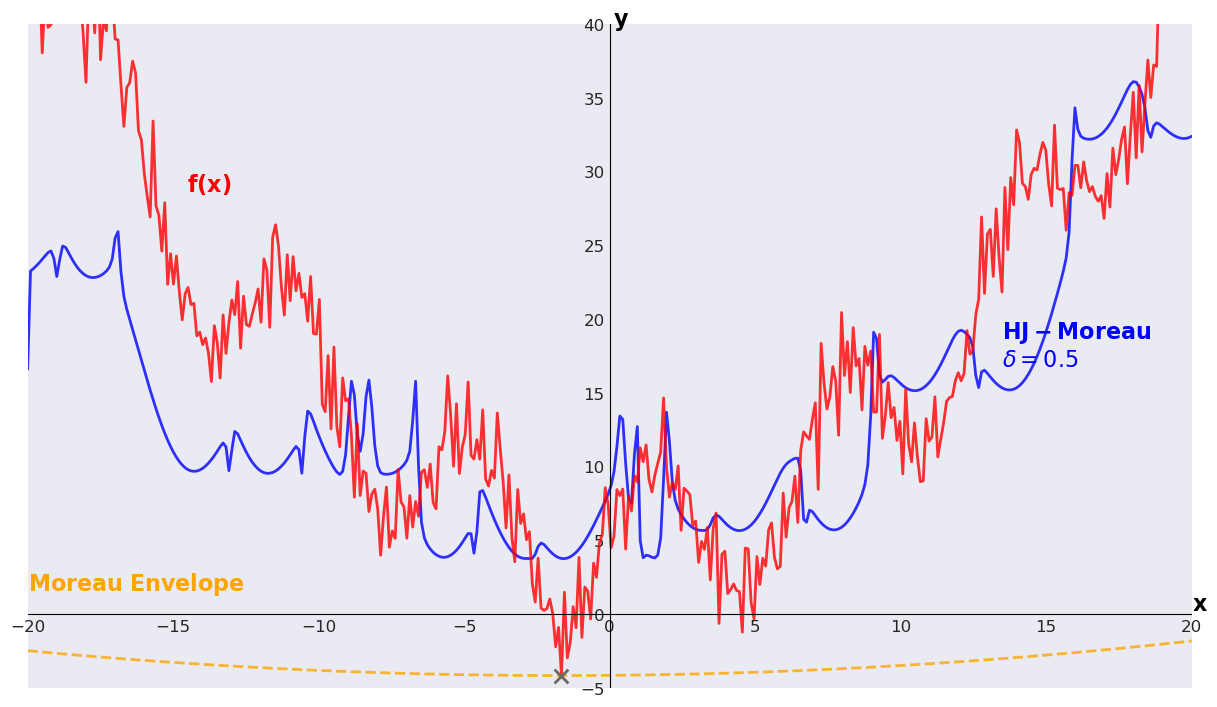

In [145]:
## Non-CONVEX BUT NON-SMOOTH FUNCTION

# Define the non-smooth function f(z)

def f(z):
    np.random.seed(0)  # Set seed for reproducibility
    noise = np.random.normal(0, 2, size=z.shape)  # Increase noise standard deviation to 2
    return 5 * np.sin(z) + 0.1 * z ** 2 + 5 + noise


def regularization_term(x, z,t):
    return 1/(2*t) * (x - z) ** 2 

def moreau_envelope(f, x, t, z):
    return np.min(f(z) + regularization_term(x, z, t))

# Generate z values

  # Combined function values

# # Create the plot
# plt.figure(figsize=(12, 7))

# # Plot non-smooth function f(z)
# plt.plot(z, y_f, label='Non-Smooth Function $f(z) = |z|$', 
#          color='red', alpha=0.8)

# # Plot combined function
# plt.plot(z, y_combined, label='Combined Function $f(z) + \\frac{1}{2}(x - z)^2$', 
#          color='blue', alpha=0.8)

# # Title and labels
# #plt.title('Proximal Point Minimization Visualization', fontsize=16)
# # plt.xlabel('z', fontsize=14)
# # plt.ylabel('Value', fontsize=14)

# # Mark the fixed point x
# plt.scatter(x_fixed, f(x_fixed), color='black', marker='x', label='Fixed $x$', zorder=5, s=100)

# # Indicate the minimum point of the combined function
# min_index = np.argmin(y_combined)
# min_z = z[min_index]
# plt.scatter(min_z, y_combined[min_index], color='green', s=100, marker='x', label='Minimum Point', zorder=5)

# # Customize ticks
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)

# # Add x and y axis lines
# plt.axhline(y=0, color='black', linewidth=0.8)
# plt.axvline(x=0, color='black', linewidth=0.8)

# # Add text labels next to the curves
# # plt.text(-15, f(-15), "$\\mathbf{f(x)}$", color='red', fontsize=16, verticalalignment='top', horizontalalignment='right')
# # plt.text(2.5, f(10)+regularization_term(x_fixed,10,t), "$\\mathbf{f(x) + \\frac{1}{2t}||x - x_0||^2}$", color='blue', fontsize=16, verticalalignment='top', horizontalalignment='left')
# # plt.text(x_fixed, f(x_fixed)-1, "$\\mathbf{x_0}$", color='black', fontsize=16, verticalalignment='top', horizontalalignment='left')
# # plt.text(min_z-5, y_combined[min_index]-1, "Minimum Point", color='green', fontsize=16, verticalalignment='top', horizontalalignment='left')
# plt.text(20, -0.1, "$\\mathbf{x}$", color='black', fontsize=16, verticalalignment='bottom', horizontalalignment='left')
# plt.text(0.1, 41, "$\\mathbf{y}$", color='black', fontsize=16, verticalalignment='top', horizontalalignment='left')


# # Adjust spines to place numbers on the axes
# ax = plt.gca()  # Get current axis
# ax.spines['left'].set_position('zero')  # Set y-axis spine to zero
# ax.spines['bottom'].set_position('zero')  # Set x-axis spine to zero
# ax.spines['top'].set_visible(False)  # Hide top spine
# ax.spines['right'].set_visible(False)  # Hide right spine

# # Grid and layout
# plt.grid()
# plt.tight_layout()
# plt.ylim(-0.5, 40)
# plt.xlim(-20,20)

# # Show plot
# plt.show()

# Generate z values

int_samples = 100
t=100
delta = 0.5
z = np.linspace(-20, 20, 400)
# Fixed point x to visualize around
x_fixed = 15
y_f = f(z)  # Non-smooth function values
y_reg = regularization_term(x_fixed, z,t)  # Regularization term values
y_combined = y_f + y_reg



def hj_moreau_envelope(f, t, z,delta,int_samples):

    moreau_envelope = np.zeros_like(z)

    standard_dev = np.sqrt(delta*t)
    # Sample from a Gaussian distribution
    for idx, x in enumerate(z):
        scale = np.sqrt(2*delta/t)

        # Generate Cauchy-distributed samples with location x_k and scale gamma
        samples = x + scale * np.random.standard_cauchy(size=int_samples)
        exponent = -(1/delta)*((f(samples)) + (((x - samples)**2) / (2 * t)) - delta*np.log(((x-samples)**2)/(scale**2) + 1))
        #samples =  standard_dev * np.random.randn(int_samples) + x

        exponent = -f(samples)/delta
        exponent = exponent - np.max(exponent)

        exp_term = np.exp(exponent)

        w = exp_term/np.sum(exp_term)

        proximal = np.sum(w*samples)

        moreau_envelope[idx] = f(proximal) + regularization_term(x, proximal, t)
    
    return moreau_envelope


# Compute the Moreau envelope at each point
y_moreau = np.array([moreau_envelope(f, x_val, t,z) for x_val in z])

# Create the plot
plt.figure(figsize=(12, 7))

plt.plot(z,hj_moreau_envelope(f,t,z,delta,int_samples),label='HJ Moreau Envelope',color='blue',alpha=0.8)

# Plot non-smooth function f(z)
plt.plot(z, y_f, label=r'Non-Smooth Function $f(z) = 5\sin(z) + 0.1z^2 + 5$', 
         color='red', alpha=0.8)

# Plot combined function (proximal point minimization)
# plt.plot(z, y_combined, label=r'Combined Function $f(z) + \frac{1}{2}(x - z)^2$', 
#          color='blue', alpha=0.8)

# Plot the Moreau envelope
plt.plot(z, y_moreau, label=r'Moreau Envelope $e_t(f)(x)$', color='orange', linestyle='--', alpha=0.8)
# plt.scatter(x_fixed, y_moreau[np.argmin(np.abs(z - x_fixed))], color='purple', s=100, marker='x', label='Moreau Point', zorder=5)

# Mark the fixed point x
# plt.scatter(x_fixed, f(x_fixed), color='black', marker='x', label='Fixed $x$', zorder=5, s=100)

# Indicate the minimum point of the combined function
# min_index = np.argmin(y_combined)
# min_z = z[min_index]
# plt.scatter(min_z, y_combined[min_index], color='green', s=100, marker='x', label='Minimum Point', zorder=5)

# # Add dotted lines linking the proximal operator and the Moreau envelope
# plt.plot([x_fixed, x_fixed], [f(x_fixed), y_moreau[np.argmin(np.abs(z - x_fixed))]], color='black', linestyle=':', label='Proximal Link', alpha=0.8)
# plt.plot([min_z, x_fixed], [y_moreau[np.argmin(np.abs(z - x_fixed))], y_moreau[np.argmin(np.abs(z - x_fixed))]], color='black', linestyle=':', label='Proximal Link', alpha=0.8)

# Indicate Global Minimum
min_index_f = np.argmin(y_f)
min_z_f = z[min_index_f]
plt.scatter(min_z_f, y_f[min_index_f], color='dimgrey', s=100, marker='x', label='Minimum Point', zorder=5)
# plt.text(-7, 4.5, "Global Minima $\\mathbf{x^{*}}$", color='dimgrey', fontsize=16, verticalalignment='top', horizontalalignment='left')

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add x and y axis lines
plt.axhline(y=0, color='black', linewidth=0.8)
plt.axvline(x=0, color='black', linewidth=0.8)

# Add text labels next to the curves
plt.text(-13, 30, "$\\mathbf{f(x)}$", color='red', fontsize=16, verticalalignment='top', horizontalalignment='right')
# plt.text(-9, 35, "$\\mathbf{f(x) + \\frac{1}{2t}||x - x_0||^2}$", color='blue', fontsize=16, verticalalignment='top', horizontalalignment='left')
# plt.text(x_fixed, f(x_fixed)-1, "$\\mathbf{x_0}$", color='black', fontsize=16, verticalalignment='top', horizontalalignment='left')
# plt.text(min_z-0.15, 15.5, "$\\hat{x}_0$", color='green', fontsize=16, verticalalignment='top', horizontalalignment='left')

plt.text(20, -0.1, "$\\mathbf{x}$", color='black', fontsize=16, verticalalignment='bottom', horizontalalignment='left')
plt.text(0.1, 41, "$\\mathbf{y}$", color='black', fontsize=16, verticalalignment='top', horizontalalignment='left')
plt.text(-20, 3, "$\\bf{Moreau}$ $\\bf{Envelope}$", color='orange', fontsize=16, verticalalignment='top', horizontalalignment='left')
plt.text(13.5, 20, "$\\bf{HJ-Moreau}$", color='blue', fontsize=16, verticalalignment='top', horizontalalignment='left')
plt.text(13.5, 18, rf"$\delta={delta}$", color='blue', fontsize=16, verticalalignment='top', horizontalalignment='left')

# plt.text(x_fixed+1, y_moreau[np.argmin(np.abs(z - x_fixed))]+1, "$\\mathbf{u(x_0,t)}$", color='purple', fontsize=16, verticalalignment='top', horizontalalignment='left')

# Adjust spines to place numbers on the axes
ax = plt.gca()  # Get current axis
ax.spines['left'].set_position('zero')  # Set y-axis spine to zero
ax.spines['bottom'].set_position('zero')  # Set x-axis spine to zero
ax.spines['top'].set_visible(False)  # Hide top spine
ax.spines['right'].set_visible(False)  # Hide right spine

# Grid and layout
plt.grid()
plt.tight_layout()
plt.ylim(-5, 40)
plt.xlim(-20, 20)

# Show plot
# plt.legend(fontsize=12)
plt.show()


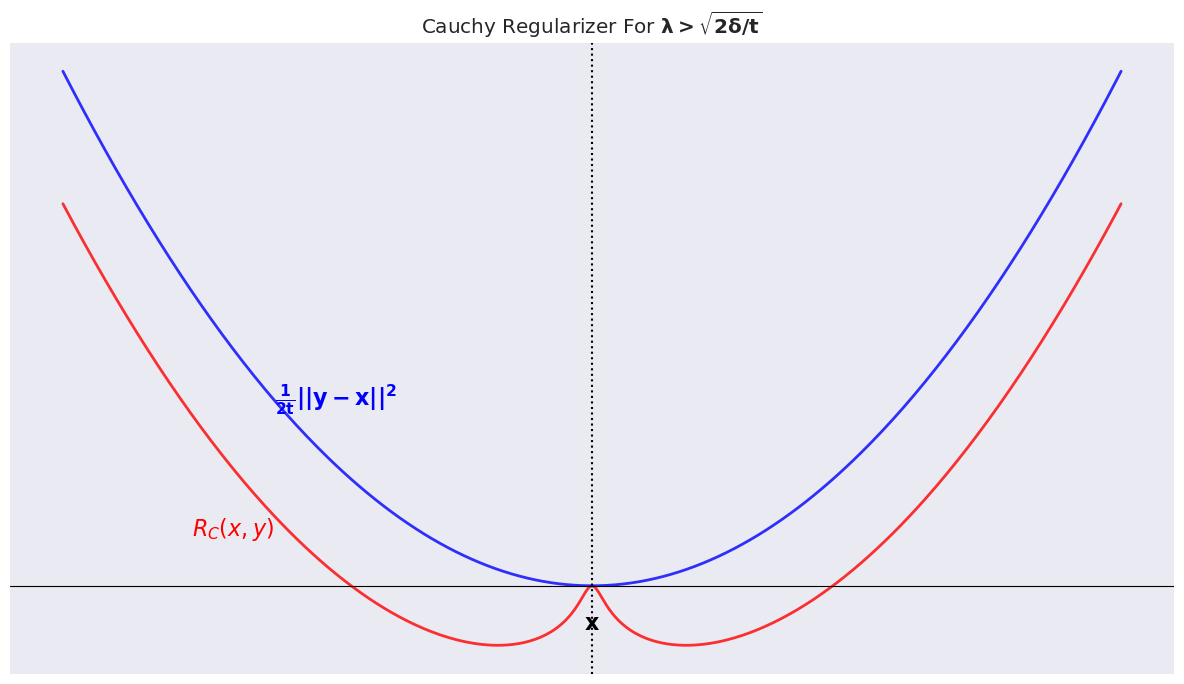

In [121]:

# Generate z values
z = np.linspace(-20, 30, 400)

# Fixed point x to visualize around
x_fixed = 5
t=100
delta = 0.1
y_reg = caucy_regularization_term(x_fixed, z,t,delta)  # Regularization term values
y_reg2 = regularization_term(x_fixed, z,t)

# Create the plot
plt.figure(figsize=(12, 7))

# Plot non-smooth function f(z)
plt.plot(z, y_reg, label=r'Non-Smooth Function $f(z) = 5\sin(z) + 0.1z^2 + 5$', 
         color='red', alpha=0.8)
plt.plot(z, y_reg2, label=r'Non-Smooth Function $f(z) = 5\sin(z) + 0.1z^2 + 5$', 
         color='blue', alpha=0.8)

# # Plot combined function (proximal point minimization)
# plt.plot(z, y_combined, label=r'Combined Function $f(z) + \frac{1}{2}(x - z)^2$', 
#          color='blue', alpha=0.8)

# # Plot the Moreau envelope
# plt.plot(z, y_moreau, label=r'Moreau Envelope $e_t(f)(x)$', color='orange', linestyle='--', alpha=0.8)
# plt.scatter(x_fixed, y_moreau[np.argmin(np.abs(z - x_fixed))], color='purple', s=100, marker='x', label='Moreau Point', zorder=5)

# # Mark the fixed point x
# plt.scatter(x_fixed, f(x_fixed), color='black', marker='x', label='Fixed $x$', zorder=5, s=100)

# # Indicate the minimum point of the combined function
# min_index = np.argmin(y_combined)
# min_z = z[min_index]
# plt.scatter(min_z, y_combined[min_index], color='green', s=100, marker='x', label='Minimum Point', zorder=5)

# # Add dotted lines linking the proximal operator and the Moreau envelope
# plt.plot([x_fixed, x_fixed], [f(x_fixed), y_moreau[np.argmin(np.abs(z - x_fixed))]], color='black', linestyle=':', label='Proximal Link', alpha=0.8)
# plt.plot([min_z, x_fixed], [y_moreau[np.argmin(np.abs(z - x_fixed))], y_moreau[np.argmin(np.abs(z - x_fixed))]], color='black', linestyle=':', label='Proximal Link', alpha=0.8)

# # Indicate Global Minimum
# min_index_f = np.argmin(y_f)
# min_z_f = z[min_index_f]
# plt.scatter(min_z_f, y_f[min_index_f], color='dimgrey', s=100, marker='x', label='Minimum Point', zorder=5)
# plt.text(-7, 4.5, "Global Minima $\\mathbf{x^{*}}$", color='dimgrey', fontsize=16, verticalalignment='top', horizontalalignment='left')

# Customize ticks
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# Customize ticks by removing the numbers
plt.xticks([])  # Remove x-axis numbers
plt.yticks([])  # Remove y-axis numbers

# Add x and y axis lines
plt.axhline(y=0, color='black', linewidth=0.8)
plt.axvline(x=x_fixed, color='black',linestyle=':', linewidth=1.5)

# Add text labels next to the curves
plt.text(-10, caucy_regularization_term(x_fixed, 20,t,delta), "$R_{C}(x,y)$", color='red', fontsize=16, verticalalignment='top', horizontalalignment='right')
plt.text(-10, caucy_regularization_term(x_fixed, 25,t,delta), "$\\mathbf{\\frac{1}{2t}||y-x||^2}$", color='blue', fontsize=16, verticalalignment='top', horizontalalignment='left')
# plt.text(x_fixed, f(x_fixed)-1, "$\\mathbf{x_0}$", color='black', fontsize=16, verticalalignment='top', horizontalalignment='left')
# plt.text(min_z-0.15, 15.5, "$\\hat{x}_0$", color='green', fontsize=16, verticalalignment='top', horizontalalignment='left')

plt.text(4.6, -0.3, "$\\mathbf{x}$", color='black', fontsize=16, verticalalignment='bottom', horizontalalignment='left')
# plt.text(0.1, 41, "$\\mathbf{y}$", color='black', fontsize=16, verticalalignment='top', horizontalalignment='left')
# plt.text(-20, 9, "Moreau Envelope $\\mathbf{u(x,t)}$", color='orange', fontsize=16, verticalalignment='top', horizontalalignment='left')
# plt.text(x_fixed+1, y_moreau[np.argmin(np.abs(z - x_fixed))]+1, "$\\mathbf{u(x_0,t)}$", color='purple', fontsize=16, verticalalignment='top', horizontalalignment='left')

# Adjust spines to place numbers on the axes
ax = plt.gca()  # Get current axis
ax.spines['left'].set_position('zero')  # Set y-axis spine to zero
ax.spines['bottom'].set_position('zero')  # Set x-axis spine to zero
ax.spines['top'].set_visible(False)  # Hide top spine
ax.spines['right'].set_visible(False)  # Hide right spine

# Add bold LaTeX title
plt.title(r"Cauchy Regularizer For $\mathbf{\lambda > \sqrt{2 \delta / t}}$")

# Grid and layout
plt.grid()
plt.tight_layout()
# plt.ylim(-0.5, 40)
# plt.xlim(-20, 20)

# Show plot
# plt.legend(fontsize=12)
plt.show()

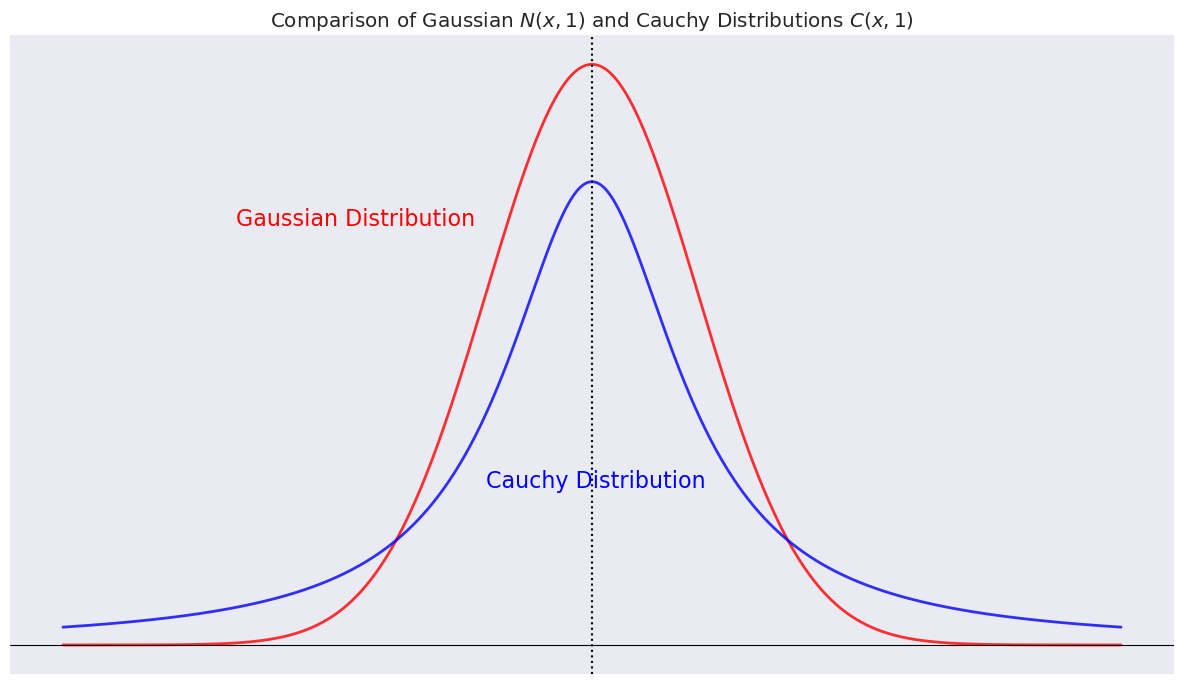

In [ ]:

# Parameters for the Gaussian distribution
mu = 0       # Mean
sigma = 1    # Standard deviation
gamma = 1

# Create an array of x values from -5 to 5
x = np.linspace(-5, 5, 1000)

# Compute the Gaussian distribution values for each x
y_gauss = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Compute the Cauchy distribution values for each x
y_cauchy = (1 / (np.pi * gamma * (1 + ((x - mu) / gamma) ** 2)))

# Create the plot
plt.figure(figsize=(12, 7))

# Plot non-smooth function f(z)
plt.plot(x, y_gauss, label=r'Non-Smooth Function $f(z) = 5\sin(z) + 0.1z^2 + 5$', 
         color='red', alpha=0.8)
plt.plot(x, y_cauchy, label=r'Non-Smooth Function $f(z) = 5\sin(z) + 0.1z^2 + 5$', 
         color='blue', alpha=0.8)

# # Plot combined function (proximal point minimization)
# plt.plot(z, y_combined, label=r'Combined Function $f(z) + \frac{1}{2}(x - z)^2$', 
#          color='blue', alpha=0.8)

# # Plot the Moreau envelope
# plt.plot(z, y_moreau, label=r'Moreau Envelope $e_t(f)(x)$', color='orange', linestyle='--', alpha=0.8)
# plt.scatter(x_fixed, y_moreau[np.argmin(np.abs(z - x_fixed))], color='purple', s=100, marker='x', label='Moreau Point', zorder=5)

# # Mark the fixed point x
# plt.scatter(x_fixed, f(x_fixed), color='black', marker='x', label='Fixed $x$', zorder=5, s=100)

# # Indicate the minimum point of the combined function
# min_index = np.argmin(y_combined)
# min_z = z[min_index]
# plt.scatter(min_z, y_combined[min_index], color='green', s=100, marker='x', label='Minimum Point', zorder=5)

# # Add dotted lines linking the proximal operator and the Moreau envelope
# plt.plot([x_fixed, x_fixed], [f(x_fixed), y_moreau[np.argmin(np.abs(z - x_fixed))]], color='black', linestyle=':', label='Proximal Link', alpha=0.8)
# plt.plot([min_z, x_fixed], [y_moreau[np.argmin(np.abs(z - x_fixed))], y_moreau[np.argmin(np.abs(z - x_fixed))]], color='black', linestyle=':', label='Proximal Link', alpha=0.8)

# # Indicate Global Minimum
# min_index_f = np.argmin(y_f)
# min_z_f = z[min_index_f]
# plt.scatter(min_z_f, y_f[min_index_f], color='dimgrey', s=100, marker='x', label='Minimum Point', zorder=5)
# plt.text(-7, 4.5, "Global Minima $\\mathbf{x^{*}}$", color='dimgrey', fontsize=16, verticalalignment='top', horizontalalignment='left')

# Customize ticks
# plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Customize ticks by removing the numbers
plt.xticks([])  # Remove x-axis numbers
plt.yticks([])  # Remove y-axis numbers

# Add x and y axis lines
plt.axhline(y=0, color='black', linewidth=0.8)
plt.axvline(x=mu, color='black',linestyle=':', linewidth=1.5)

# Add text labels next to the curves
plt.text(-1.1, 0.3, "Gaussian Distribution", color='red', fontsize=16, verticalalignment='top', horizontalalignment='right')
plt.text(-1, 0.12, "Cauchy Distribution", color='blue', fontsize=16, verticalalignment='top', horizontalalignment='left')
# plt.text(x_fixed, f(x_fixed)-1, "$\\mathbf{x_0}$", color='black', fontsize=16, verticalalignment='top', horizontalalignment='left')
# plt.text(min_z-0.15, 15.5, "$\\hat{x}_0$", color='green', fontsize=16, verticalalignment='top', horizontalalignment='left')

# plt.text(4.6, -0.3, "$\\mathbf{x}$", color='black', fontsize=16, verticalalignment='bottom', horizontalalignment='left')
# plt.text(0.1, 41, "$\\mathbf{y}$", color='black', fontsize=16, verticalalignment='top', horizontalalignment='left')
# plt.text(-20, 9, "Moreau Envelope $\\mathbf{u(x,t)}$", color='orange', fontsize=16, verticalalignment='top', horizontalalignment='left')
# plt.text(x_fixed+1, y_moreau[np.argmin(np.abs(z - x_fixed))]+1, "$\\mathbf{u(x_0,t)}$", color='purple', fontsize=16, verticalalignment='top', horizontalalignment='left')

# Adjust spines to place numbers on the axes
ax = plt.gca()  # Get current axis
ax.spines['left'].set_position('zero')  # Set y-axis spine to zero
ax.spines['bottom'].set_position('zero')  # Set x-axis spine to zero
ax.spines['top'].set_visible(False)  # Hide top spine
ax.spines['right'].set_visible(False)  # Hide right spine

# Add bold LaTeX title
plt.title(r"Comparison of Gaussian $N(x,1)$ and Cauchy Distributions $C(x,1)$")

# Grid and layout
plt.grid()
plt.tight_layout()
# plt.ylim(-0.5, 40)
# plt.xlim(-20, 20)

# Show plot
# plt.legend(fontsize=12)
plt.show()